# Förderhinweis

Dieses Dokument ist Teil des Lehrmaterials für die **Zusatzqualifikation KI und Maschinelles Lernen.** 

Die Entwicklung und Erprobung dieses Bildungsangebotes wurde vom Bundesministerium für Bildung und Forschung im Rahmen des InnoVET-Programms gefördert.

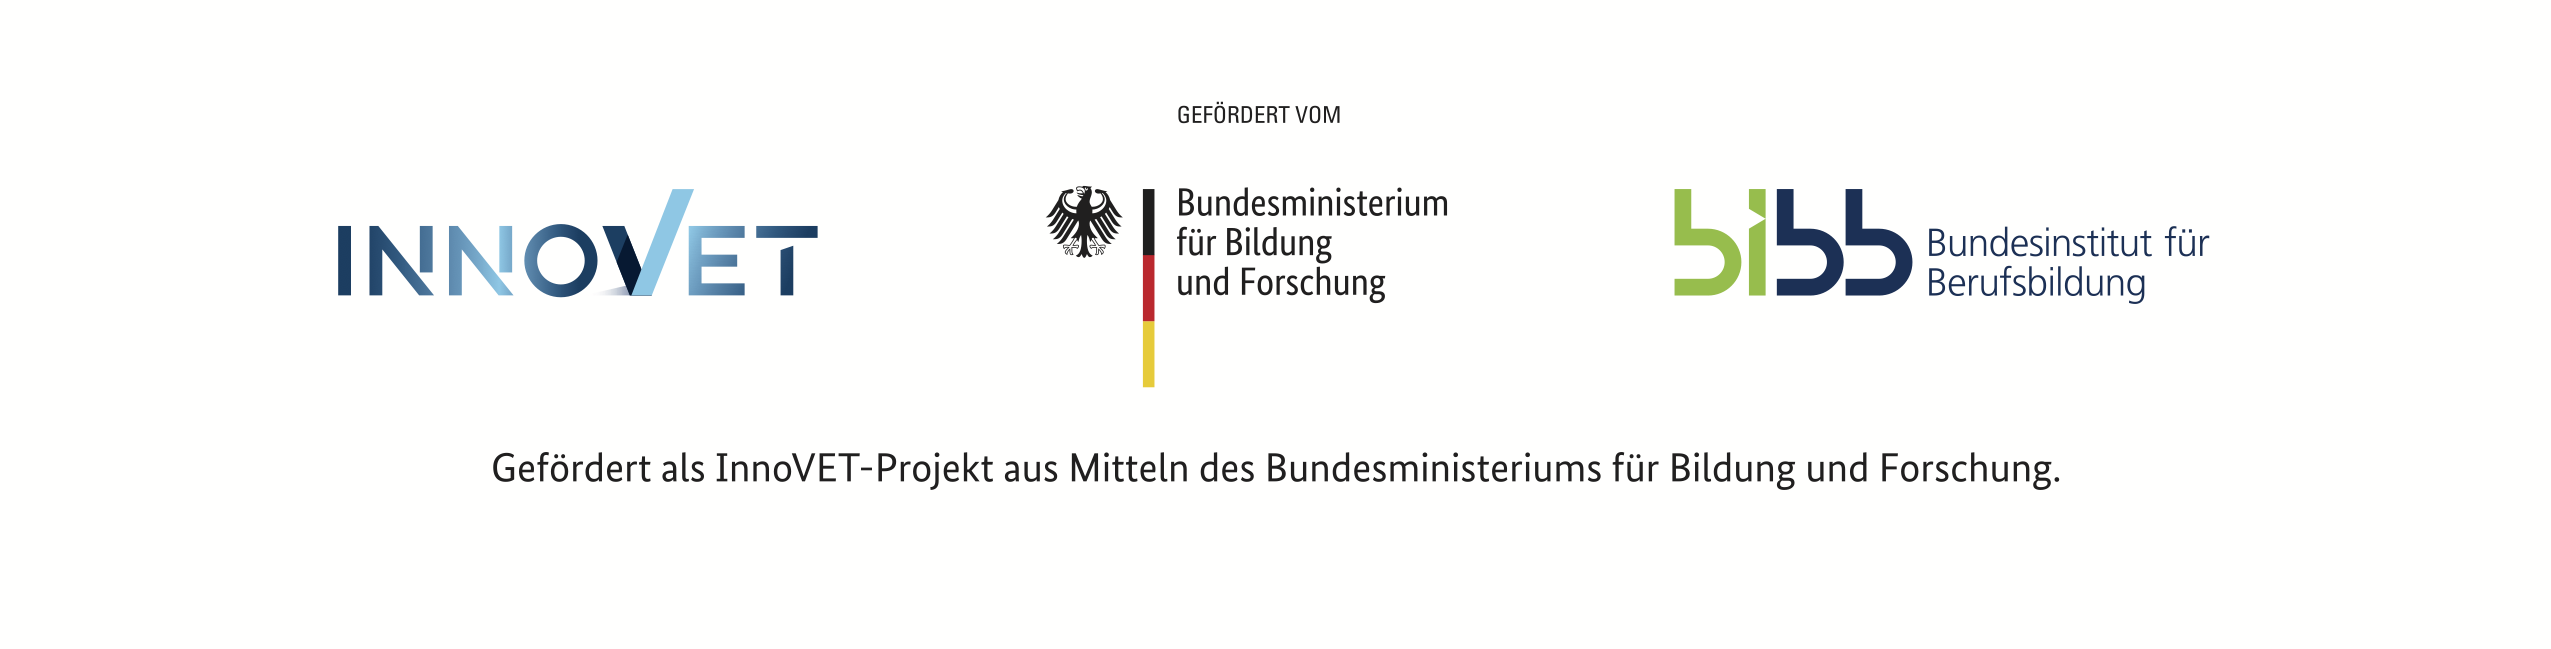

# Lizenzhinweis

Dieses Notebook "Evaluationsmaße" wurde von Dirk Väth, Lindsey Vanderlyn und Antje Schweitzer, KI B3 / Universität Stuttgart, erstellt. 

Das Werk, mit Ausnahme der oben abgebildenten Förderlogos, ist lizenziert unter [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/deed.de) (Namensnennung 4.0 International)

# Evaluierung von KI-Modellen

In diesem Notebook geht es darum, herauszufinden wie "gut" die Vorhersagen eines trainierten KI-Modells sind. 

Als Grundlage dazu dient ein Entscheidungsbaum für die Klassifizierung von Irisarten. Wie dieser trainiert wird, haben wir im [ersten Notebook zum Training von Klassifikationsbäumen](https://colab.research.google.com/drive/1JP7m_I2jtyIuffvJzODuokzRPzrF15GH?usp=sharing) bereits gesehen.

Wir werden uns jetzt ansehen, wie man die Qualität eines solchen KI-Modells beurteilen kann.

## Bibliotheken laden

Wir benötigen zum Erstellen des Klassifikationsbaums wieder das Modul `tree` aus der Bibliothek `sklearn` und für das Laden des Iris-Datensatzes die Bibliothek `pandas`. Ebenso benötigen wir wieder die Bibliothek `matplotlib`, damit wir unser Modell und dessen Evaluierung visualisieren können.

In [ ]:
import pandas                 # Bibliothek für das Laden der Iris-Daten
from sklearn import tree      # Bibliothek für den Entscheidungsbaum
from matplotlib import pyplot # Bibliothek für die Visualisierung

## Daten laden, vorbereiten und Entscheidungsbaum trainieren

Innerhalb dieses Abschnitts wiederholen wir die Schritte, wie wir [in einem früheren Notebook bereits](https://colab.research.google.com/drive/1JP7m_I2jtyIuffvJzODuokzRPzrF15GH?usp=sharing) kennengelernt haben, um einen Entscheidungsbaum für den Iris-Datensatz zu trainieren.

In [ ]:
 # Daten laden
iris_url = 'https://datahub.io/machine-learning/iris/r/iris.csv'
iris = pandas.read_csv(iris_url)

# englische Begriffe übersetzen
iris.rename(columns = {'sepallength':'Kelchblattlänge','sepalwidth':'Kelchblattbreite', 'petallength':'Kronblattlänge', 'petalwidth':'Kronblattbreite', 'class':'Irisart'}, inplace=True)
# erste Zeilen anzeigen
print(iris.head(3))

   Kelchblattlänge  Kelchblattbreite  Kronblattlänge  Kronblattbreite  \
0              5.1               3.5             1.4              0.2   
1              4.9               3.0             1.4              0.2   
2              4.7               3.2             1.3              0.2   

       Irisart  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  


In [ ]:
# Data Frames für die erklärenden Variablen sowie die erklärte Variable generieren
X=pandas.DataFrame(iris[['Kelchblattlänge','Kelchblattbreite','Kronblattbreite','Kronblattlänge']])
y=pandas.DataFrame(iris[['Irisart']])

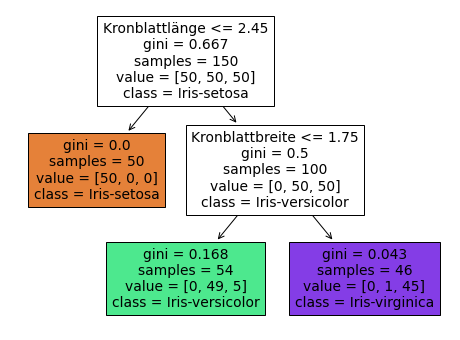

In [ ]:
# Baum initialisieren (vorbereiten)
baum = tree.DecisionTreeClassifier(max_depth=2)
# Baum trainieren
baum.fit(X, y)
# Baum grafisch darstellen
features = ['Kelchblattlänge','Kelchblattbreite','Kronblattbreite','Kronblattlänge'] # Features benennen
klassen = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']                       # Klassen benennen
pyplot.figure(figsize=(8,6))                                               # Größere Grafikfläche vorbereiten
tree.plot_tree(baum,feature_names=features,class_names=klassen,filled=True); # Baum zeichnen

## Klassen mit unserem Modell vorhersagen

Wir kennen zwar schon die "korrekten" Klassen für die Datenpunkte, mit denen wir unser Modell trainiert haben (diese haben wir in die Variable `y` geladen), aber wir wissen noch nicht, wie gut unser trainiertes Modell dabei ist, diese Klassen allein aus den erklärenden Variablen vorherzusagen.

Mit der Funktion `predict` können wir unser Modell (hier: `baum`) nutzen, um die vorhergesagten Klassen $\hat{y}$ für die Eingabedaten `X` zu berechnen.



---

**Die Markierung durch einen Hut bzw. Dach über einer Variablen (hier $\hat{y}$) wird häufig dafür genutzt, um von einem Modell vorhergesagte Klassen zu bezeichnen, während die Variable ohne Hut/Dach die "echten", korrekten Klassen enthält (hier $y$).**

---

In [ ]:
# Nutze unseren Enscheidungsbaum, um die Klassen aus den erklärenden Variablen X vorherzusagen
y_hut = baum.predict(X) 

Sehen wir uns einmal die Vorhersagen für die ersten 3 Datenpunkte an:

In [ ]:
# Gib die Klassen für die ersten Vorhersagen unseres Modells aus
# die Schreibweise [:3] bedeutet "von 0 bis 3"
y_hut[:3]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa'], dtype=object)

Hier zum Vergleich die ersten 3 korrekten Klassen für diese Datenpunkte, die wir aus unserem Datensatz kennen:

In [ ]:
# Gib die korrekten Klassen für die ersten Datenpunkte aus unserem Datensatz aus 
y[:3]

,Irisart
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa


Ein erster Anhaltspunkt für die Qualität eines Modells ist natürlich, für wie viele der Datenpunkte es die korrekte Klasse vorhersagen kann. Dieses Maß nennt man **Accuracy**. Meist wir dieser englische Begriff verwendet, allerdings findet man manchmal auch die deutsche Bezeichnung "Korrektklassifikationsrate" (so z.B. bei Wikipedia) oder auch nur "Genauigkeit" - Letzteres ist allerdings nicht präzise, oft ist damit etwas anderes gemeint. Da "Korrektklassifikationsrate" etwas sperrig ist und auch nicht allzu oft verwendet wird, werden wir hier den englischen Begriff *Accuracy* beibehalten. 

Die *Accuracy* ist ein sogenanntes **Evaluationsmaß** für KI-Modelle. Da Maße auch als Metriken bezeichnet werden, findet man manchmal auch die Bezeichnung **Evaluationsmetrik**. 

Wie die Accuracy berechnet wird, werden wir uns im nächsten Abschnitt anschauen.


---

**Evaluationsmaße oder auch Evaluationsmetriken sind Maße, die die Qualität von KI-Modellen erfassen.**

**Accuracy ist ein Beispiel für ein solches Evaluationsmaß.**

---


## Accuracy

Die Bibliothek `sklearn` enthält eine Funktion, um die *Accuracy* eines trainierten Modells messen zu können, welche wir zunächst importieren müssen.

In [ ]:
# Importiere die Funktion, die die Accuracy berechnen kann
from sklearn.metrics import accuracy_score

---

**Das Modul `metrics` aus der `sklearn`-Bibliothek enthält die Methode `accuracy_score()` zur Berechnung der Accuracy für mit `sklearn` trainierte Modelle.**

---

Diese Funktion berechnet die *Accuracy* zwischen den Klassen, wie sie im Datensatz annotiert sind, und den vom Modell vorhergesagten Klassen für diesen Datensatz (also den Anteil der korrekt vorhergesagten Klassen am gesamten Datensatz). 

Dazu zählt diese Methode, für wie viele Datenpunkte vorhergesagte und annotierte Klasse übereinstimmen, und teilt dann durch die Anzahl aller Datenpunkte.


Die Funktion `accuracy_score` benötigt folgende Informationen, um die *Accuracy* berechnen zu können:


*   `y_true`: Ein Array, das pro Datenpunkt im Datensatz die "korrekte" (annotierte) Klasse für diesen Datenpunkt enthält (z.B. für den ersten Datenpunkt: `Iris-setosa`) - diese Daten haben wir bereits in die Variable `y` geladen.
*   `y_pred`: Ein Array, das pro Datenpunkt im Datensatz die durch unser Modell vorhergesagte Klasse enthält - diese Daten haben wir bereits in der Variablen `y_hut` gespeichert.

Dabei ist wichtig, dass `y` und `y_hut` dieselbe Reihenfolge bzgl. der Datenpunkte haben (für den 1. Datenpunkt muss in `y` an Stelle 0 die Klasse aus dem Datensatz und in `y_hut` an derselben Stelle die vorhergesagte Klasse für denselben Datenpunkt stehen).

Die vollständige Dokumentation dieser Funktion findet man übrigens [hier](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) (Englisch).


In [ ]:
# Berechne die Accuracy (Anteil korrekt vorhergesagter Klassen)
accuracy = accuracy_score(y_true=y, y_pred=y_hut)
print(accuracy)

0.96


Die Ausgabe gibt den Anteil der korrekt vorhergesagten Klassen am gesamten Datensatz an.
Dieses Verhältnis kan man ganz einfach in Prozent umrechnen, indem man diesen Wert mit `100` multipliziert!

In [ ]:
# Wandle Accuracy in Prozent um
100 * accuracy

96.0

Unser Modell macht also noch bei 4% aller Datenpunkte einen Fehler! 
Was uns die Accuracy allerdings nicht sagt, ist, wo diese Fehler auftreten.
Also wissen wir nicht, ob unser Modell z.B. für Datenpunkte einer bestimmten Klasse schlechter funktioniert, und welche Klassen in diesen Fällen stattdessen vorhergesagt wurden. 



---

**Die Accuracy gibt an, für welchen Anteil der Datenpunkte die korrekte Klasse vorhergesagt wird. Man berechnet sie also als die Anzahl der korrekten Vorhersagen geteilt durch die Anzahl aller Vorhersagen.**

---

## Konfusionsmatrix

Welche Klassen vom Modell wie klassifiziert werden, kann man mithilfe der sogenannten **Konfusionsmatrix** analysieren. Mit ihr kann man oft systematische Probleme des Modells oder der Daten/Features erkennen. 

Der Name kommt vom Wort *Konfusion*, also Verwechslung - die Konfusionsmatrix zeigt, welche Klassen von KI-Modellen miteinander verwechselt werden. 


Die Bibliothek `sklearn` enthält eine Funktion, um die *Konfusionsmatrix* eines trainierten Modells erstellen zu können. Auch diese müssen wir zunächst wieder importieren.

In [ ]:
# Importiere die Funktion, die die Konfusionsmatrix berechnen kann
from sklearn.metrics import confusion_matrix

---

**Das Modul `metrics` aus der `sklearn`-Bibliothek enthält die Methode `confusion_matrix()` zur Berechnung der Konfusionsmatrix für mit `sklearn` trainierte Modelle.**

---

Genau wie bei der Accuracy benötigen wir wieder die Modellvorhersagen $\hat{y}$ und die "echten" Klassen $y$ als Funktionsparameter, diesmal für die Funktion `confusion_matrix`.
Dies gilt normalerweise für alle Evaluationsmaße.

*   `y_true`: Ein Array, das pro Datenpunkt im Datensatz die "korrekte" (annotierte) Klasse für diesen Datenpunkt enthält (z.B. für den ersten Datenpunkt: `Iris-setosa`) - diese Daten haben wir bereits in die Variable `y` geladen.
*   `y_pred`: Ein Array, das pro Datenpunkt im Datensatz die durch unser Modell vorhergesagte Klasse enthält - diese Daten haben wir bereits in der Variablen `y_hut` gespeichert.

Dabei ist wieder wichtig, dass `y` und `y_hut` dieselbe Reihenfolge bzgl. der Datenpunkte haben (für den 1. Datenpunkt muss in `y` an Stelle 0 die Klasse aus dem Datensatz und in `y_hut` an derselben Stelle die vorhergesagte Klasse für denselben Datenpunkt stehen).

Da wir `y_hut` oben schon berechnet haben und `y` aus dem Datensatz gelesen haben, können wir also direkt loslegen.

In [ ]:
# Berechne die Konfusionsmatrix aus den korrekten Klassen und den vorhergesagten Klasen
confusion_matrix(y, y_hut)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]])

Das sieht vielleicht erstmal etwas verwirrend aus, ist aber einfach zu verstehen.
Jede Zeile steht für eine "korrekte" Klasse im Datensatz, hier also:

In [ ]:
print(klassen)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


Das heißt, die erste Zeile steht für Iris Setosa, die zweite für Versicolor und die dritte für Virginica. 

Die Spalten geben dagegen die Anzahl der von unserem Modell vorhergesagten Klassen für diese Datenpunkte an. 

Die Konfusionsmatrix zeigt hier also:

* Es gibt 50 Datenpunkte mit "richtiger" Klasse *Iris-setosa*. Die Modellvorhersagen für diese Datenpunkte stehen in Zeile 1. Anscheinend wurden alle richtig klassifiziert: das Modell hat für diese Eingaben niemals fälschlicherweise eine der beiden anderen Klassen vorhergesagt (Spalte 2 und 3 sind 0 für diese Zeile).
* Es gibt 50 Datenpunkte mit "richtiger" Klasse *Iris-versicolor*. Die Modellvorhersagen für diese Datenpunkte stehen in Zeile 2. Hier wurden 49 Datenpunkte richtig klassifiziert (Spalte 2), und das Modell hat einen Datenpunkt fälschlicherweise als *Iris-virginica* vorhergesagt (Spalte 3 ist 1 für diese Zeile).
* Es gibt 50 Datenpunkte mit "richtiger" Klasse *Iris-virginica*. Die Modellvorhersagen für diese Datenpunkte stehen in Zeile 3. Hier wurden 45 Datenpunkte richtig klassifiziert: das Modell hat einen Datenpunkt fälschlicherweise als *Iris-versicolor* vorhergesagt (Spalte 2 ist 5 für diese Zeile).

---

**Die Konfusionsmatrix zeigt, welche Klassen häufig miteinander verwechselt werden.**

---

Die vielleicht interessantesten Zellen dieser Matrix sind die der Diagonalen. Die Bezeichnung "Diagonale" bezieht sich auf die Zellen, die dieselbe Zeilen- wie Spaltennummer haben - also Zeile 1, Spalte 1 sowie Zeile 2, Spalte 2 sowie Zeile 3, Spalte 3. Diese Zellen sind interessant, weil sie genau die Fälle enthalten, bei denen die vorhergesagte Klasse auch die richtige Klasse ist. 


---

**Die Diagonale einer Matrix bezeichnet die Elemente (Zellen), bei denen die Zeilennummer der Spaltennummer entspricht.**

---


Wenn man sich also die Elemente auf der Diagonalen dieser Matrix ansieht **(50,49,45)**, kann man erkennen, für wie viele Datenpunkte der Klassen die Modellvorhersage jeweils korrekt war.

Weiterhin finden wir die Anzahl der Datenpunkte, die zu einer bestimmten Klasse gehörten, indem wir die Zellen in der betreffenden Zeile aufaddieren: wir hatten 50+0+0 Setosas, 0+49+1, also ebenfalls 50 Versicolors, und 0+5+45, also 50, Virginicas.

Teilen wir eines dieser Diagonalelemente durch die Anzahl der Datenpunkte für diese Klasse, erhalten wir die Accuracy, allerdings nach Klassen getrennt statt für alle Daten auf einmal, wie oben:

*   *Iris-setosa* (Zeile 1): $\frac{50}{50 + 0 + 0} = 1.0$ → 100%
*   *Iris-versicolor* (Zeile 2): $\frac{49}{0 + 49 + 1} = 0.98$ → 98%
*   *Iris-virginica* (Zeile 3): $\frac{45}{0 + 5 + 45} = 0.9$ → 90%

Wenn wir dagegen alle Diagonalelemente summieren, erhalten wir die Anzahl der insgesamt richtigen Vorhersagen. Teilen wir hier wieder durch die Anzahl aller Datenpunkte im Datensatz (also die Summe aller Zellen), finden wir die gesamte Accuracy aus dem vorherigen Abschnitt wieder: $\frac{50+49+45}{150} = 0.96$  → 96%

---

**Die Diagonale der Konfusionsmatrix zeigt die Anzahl der Datenpunkte, für die die Vorhersage der Klasse korrekt war.**

**Anhand der Konfusionsmatrix kann man die Accuracy nach Klassen getrennt berechnen. Dies ist oft aussagekräftiger als die Gesamt-Accuracy.**

---

Die vollständige Dokumentation der Funktion `confusion_matrix` findet sich übrigens [hier](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion+matrix#sklearn.metrics.confusion_matrix) (Englisch).

### Visualisierung der Konfusionsmatrix

Es gibt auch eine Funktion, um diese Konfusionsmatrix graphisch darzustellen.
Dabei ändert sich nichts an den Bedeutungen von Zeile und Spalte.
Dafür gibt es gibt eine farbliche Kodierung für die Anzahl der Datenpunkte, und die Zeilen und Spalten geben den Klassennamen mit aus!
Neben bzw. unter den Klassennamen sieht man sogar, dass die "korrekten" Klassen in den Zeilen stehen *(True label)* bzw. die vohergesagten Klassen in den Spalten *(Predicted Label)*.

Die Farbskala neben der Matrix zeigt, wie viele Elemente es jeweils waren: Die maximale Zahl, hier 50, wird durch die helle gelbe Farbe besonders hervorgehoben - man sieht also auf den ersten Blick, dass die Diagonale sehr hell ist, was dafür spricht, dass das Modell ganz gut ist. Denn die Zellen in der Diagonalen stehen ja genau für die Elemente für die die Vorhersage der korrekten Klasse entspricht - je höher die Zahlen in der Diagonalen also, desto besser!

Die Funktion gehört zu einer sogenannten Klasse, in diesem Fall zur Klasse `ConfusionMatrixDisplay`. Eine Klasse enthält Eigenschaften und Funktionen bestimmter Objekte - wozu das gut ist, führt hier zu weit. Jedenfalls ist in dieser Klasse die Funktion `from_predictions()` enthalten, mit der man eine Konfusionsmatrix berechnen kannn, basierend auf den Vorhersagen eines Modells. Damit klar ist, dass die Funktion `from_predictions()` aus der Klasse `ConfusionMatrixDisplay` gemeint ist, muss man hier den Namen der Klasse mit einem Punkt vor den Funktionsnamen schreiben, also so:

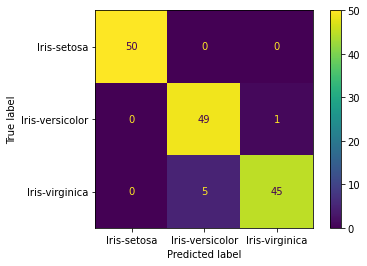

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay # Importiere die Visualisierungsfunktion für Konfusionsmatrizen
ConfusionMatrixDisplay.from_predictions(y, y_hut)  # Gebe Konfusionsmatrix als Grafik aus 

---

**Im Modul `metrics` gibt es eine Klasse `ConfusionMatrixDisplay`, die eine Methode namens `from_predictions()` enthält. Mit ihr kann man die Konfusionsmatrix farbig visualisieren.**

---

## Precision und Recall



Aus der Konfusionsmatrix kann man auch die Metriken *Precision* und *Recall* erhalten. 

Auch diese sind aussagekräftiger als die Gesamt-*Accuracy*, aber leichter zu lesen als eine Konfusionsmatrix, da es sich jeweils nur um einen Wert handelt. 

Die *Precision* (auf Deutsch auch: positiver Vorhersagewert) drückt aus, in wie vielen Fällen eine vom Modell vorhergesagte Klasse tatsächlich korrekt ist. Natürlich will man, dass dieser Wert möglichst hoch ist. Allerdings heißt ein hoher Wert hier alleine noch nichts: ein Modell, das z.B. nur in 2 Fällen "Iris Setosa" vorhersagt, dabei aber beide Male richtig liegt, erreicht 100% Precision... Interessant ist daher außerdem der sogenannte *Recall*: in wie vielen Fällen wird die korrekte Klasse auch vorhergesagt? Auch hier ist ein hoher Wert gut, aber noch nicht alles: ein Modell, das einfach in jedem Fall "Iris Setosa" vorhersagt, erreicht für diese Klasse 100% Recall, liegt aber bei den anderen Klassen dafür ständig falsch.  

---

**Die Precision drückt aus, in wie vielen Fällen die vom Modell vorhergesagte Klasse tatsächlich korrekt ist.**

**Der Recall drückt aus, in wie vielen Fällen die echte Klasse auch vom Modell vorhergesagt wird.**

---

Funktionen zur Berechnung von *Precision* und *Recall* sind ebenfalls in `sklearn` enthalten, und wir müssen sie zunächst wieder importieren.

In [ ]:
from sklearn.metrics import precision_score # Importiere die Funktion, die die Precision berechnen kann
from sklearn.metrics import recall_score    # Importiere die Funktion, die den Recall berechnen kann

---

**Die Methoden `precision_score()` und `recall_score()` aus der Bibliothek `sklearn` berechnen Precision und Recall.**

---

Sehen wir uns zunächst die *Precision* an.

Die Methode `precision_score` benötigt, genau wie die bisherigen Evaluationsmaße, die korrekten Klassen sowie die vom Modell vorhergesagten Klassen:
*   `y_true`: Ein Array, das pro Datenpunkt im Datensatz die "korrekte" (annotierte) Klasse für diesen Datenpunkt enthält (z.B. für den ersten Datenpunkt: `Iris-setosa`) - diese Daten haben wir bereits in die Variable `y` geladen.
*   `y_pred`: Ein Array, das pro Datenpunkt im Datensatz die durch unser Modell vorhergesagte Klasse enthält - diese Daten haben wir bereits in der Variablen `y_hut` gespeichert.

Hier benötigen wir aber noch einen zusätzlichen Paramter:
*   `average`: Dieser Parameter gibt die Gewichtung der verschiedenen Klassen bei der Berechnung der *Precision* an. Folgende Optionen gibt es:
  * `binary`: Falls es nur 2 Klassen gibt. In diesem Beispiel haben wir aber 3 Klassen
  * `micro`: Berechnet die *Precision*, ohne die Verteilung der Datenpunke bzgl. der Klassen zu berücksichtigen: dies ergibt einfach wieder die Gesamt-Accuracy.
  * `macro`: Berechnet die *Precision* pro Klasse und berechnet den Durchschnitt über alle Klassen-*Precision*-Werte
  * `weighted`: Berechnet die *Precision* pro Klasse und berechnet einen gewichteten Durchschnitt über alle Klassen-*Precision*-Werte, bei dem die Anzahl der Datenpunkte pro Klasse berücksichtigt wird

In unserem Fall geben `macro` und `weighted` genau denselben Wert zurück, da wir gleich viele Datenpunkte pro Klasse haben (genau 50 pro Klasse)! 
Ganz kleine Unterschiede im Nachkommabereich sind dabei Rundungsfehler.

In [ ]:
# Berechne die Precision pro Klasse (Iris-setosa, Iris-versicolor, Iris-virginica) und dann den Durschnitt dieser Precisions
precision_score(y, y_hut, average='macro')

0.9618894256575415

In [ ]:
# Berechne die Precision pro Klasse (Iris-setosa, Iris-versicolor, Iris-virginica) und dann den gewichteten Durschnitt (50 Datenpunkte pro Klasse) dieser Precisions
precision_score(y, y_hut, average='weighted')

0.9618894256575417

Die Methode `recall_score` hat genau dieselben Parameter.

Berechnen wir also den Recall:

In [ ]:
recall_score(y, y_hut, average='macro')

0.96

Die Dokumentation zu diesen Methoden findet sich [hier](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) und [hier](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html?highlight=recall_score#sklearn.metrics.recall_score) (Englisch).

## F$_1$-Score

Aus *Precision* und *Recall* können wir nun den *F1-Score* berechnen. Da wir die Formel kennen (das harmonische Mittel aus Precision und Recall), ist das problemlos "von Hand" möglich.

---

**Der F$_1$-Score ist das harmonische Mittel aus Precision und Recall.**

---

In [ ]:
precision = precision_score(y, y_hut, average='macro') # Berechne precision, wie oben
recall = recall_score(y, y_hut, average='macro')       # Berechne recall, wie oben
f1 = 2 * (precision * recall) / (precision + recall)   # Berechne den F1-Score aus precision und recall
print(f1)

0.9609437840736438


Natürlich gibt es auch eine Methode `f1_score`, die das für uns in einem Schritt erledigen kann:

In [ ]:
from sklearn.metrics import f1_score # Importiere die Funktion, die den F1 Score berechnet

---

**Die Methode `f1_score()` aus der Bibliothek `sklearn` berechnet den F$_1$-Score.**

---

Da man aus *Precision* und *Recall* den *F1-Score* berechnen kann, kann man sich wahrscheinlich schon denken, welche Parameter wir für diese neue Funktion benötigen: genau, dieselben wie für `precision_score` und `recall_score`!

*   `y_true`: Ein Array, das pro Datenpunkt im Datensatz die "korrekte" (annotierte) Klasse für diesen Datenpunkt enthält (z.B. für den ersten Datenpunkt: `Iris-setosa`) - diese Daten haben wir bereits in die Variable `y` geladen.
*   `y_pred`: Ein Array, das pro Datenpunkt im Datensatz die durch unser Modell vorhergesagte Klasse enthält - diese Daten haben wir bereits in der Variablen `y_hut` gespeichert.
*   `average`: Dieser Parameter gibt die Gewichtung der verschiedenen Klassen bei der Berechnung der *Precision* an. Folgende Optionen gibt es:
  * `binary`: Falls es nur 2 Klassen gibt. In diesem Beispiel haben wir aber 3 Klassen
  * `micro`: Berechnet die *Precision*, ohne die Verteilung der Datenpunke bzgl. der Klassen zu berücksichtigen.
  * `macro`: Berechnet die *Precision* pro Klasse und berechnet den Durchschnitt über alle Klassen-*Precision*-Werte
  * `weighted`: Berechnet die *Precision* pro Klasse und berechnet einen gewichteten Durchschnitt über alle Klassen-*Precision*-Werte, bei dem die Anzahl der Datenpunkte pro Klasse berücksichtigt wird

In [ ]:
f1_score(y, y_hut, average='macro') # Berechne F1-score in einem Schritt

0.9599358974358975

Der Unterschied zu unserer selbst berechneten Methode ist sehr klein, allerdings sieht man ihn hier schneller, da schon die 2. Ziffer nach dem Komma anders ist.
Auch das kann man wieder auf Rundungsfehler durch unterschiedliche Berechnungsmethoden zurückführen.

## Evaluationsmaße für Regression

In diesem Notebook haben wir uns nur Evaluationsmaße für Klassifikation angesehen. Wie Sie sich vielleicht denken können, kann man keine Konfusionsmatrix für eine Regression berechnen, da wir keine Vorhersagen (Klassen) haben, die entweder richtig oder falsch sind, so dass wir zählen könnten, wie oft die Vorhersagen korrekt sind. Statt dessen berechnen wir bei der Regression kontinuierliche Werte.

Allerdings interessieren wir uns natürlich auch bei Regression dafür, wie gut unsere Modelle sind. Interessant ist dabei dann, zu messen, um wie viel die vorhergesagten Werte von den tatsächlichen Werten abweichen.

Sie kennen dazu aber bereits 3 Metriken aus den Materialien zur linearen Regression:

*   Mittlere quadratische Abweichung (*MSE*)
*   Wurzel der mittleren quadratischen Abweichung (*RMSE*)
*   Determinationskoeffizienten (*$R^2$*)

Die letzte davon haben wir im [Notebook zu linearer Regression](https://colab.research.google.com/drive/1tnWA26HqvdAcH2pIVRNPf5uZtPIR59_H?usp=sharing) auch bereits selbst berechnet. 



# Zusammenfassung

In diesem Notebook haben Sie gelernt, wie man Klassifikationsmodelle evaluieren kann.
Wir haben gesehen, das *Accuracy* ein sehr grober Wert ist, der es nicht erlaubt, modell- oder datenspezifische Probleme zu finden.
Die *Konfusionsmatrix* haben wir benutzt, um die Modellvorhersagen genauer zu analysieren. Schließlich haben wir mit *Precision*, *Recall* bzw. *F1-Score* Werte kennengelernt, die eine Zusammenfassung der Konfusionsmatrix in verschiedene aussagekräftige Maße erlauben.

Für Regression benötigen wir dagegen andere Evaluationsmaße (siehe Material zu linearer Regression).

Folgende wichtige Punkte halten wir fest:



## Zusammenfassung Programmieren

---
* Das Modul `metrics` aus der `sklearn`-Bibliothek enthält mehrere Methoden zur Berechnung von Evaluationsmaßen für mit `sklearn` trainierte Modelle: 
 * Die Methode `accuracy_score()` zur Berechnung der Accuracy
 * Die Methode `confusion_matrix()` zur Berechnung der Konfusionsmatrix
 * Die Methoden `precision_score()` und `recall_score()` zur Berechnung von Precision und Recall
 * Die Methode `f1_score()` zur Berechnung des F$_1$-Score
* Im Modul `metrics` gibt es eine Klasse `ConfusionMatrixDisplay`, die eine Methode namens `from_predictions()` enthält. Mit ihr kann man die Konfusionsmatrix farbig visualisieren.

---




## Zusammenfassung Evaluationsmaße

---
* Die Accuracy gibt an, für welchen Anteil der Datenpunkte die korrekte Klasse vorhergesagt wird. Man berechnet sie also als die Anzahl der korrekten Vorhersagen geteilt durch die Anzahl aller Vorhersagen.
* Die Konfusionsmatrix zeigt, welche Klassen häufig miteinander verwechselt werden.
* Die Diagonale einer Matrix bezeichnet die Elemente (Zellen), bei denen die Zeilennummer der Spaltennummer entspricht.
* Die Diagonale der Konfusionsmatrix zeigt die Anzahl der Datenpunkte, für die die Vorhersage der Klasse korrekt war.
* Anhand der Konfusionsmatrix kann man die Accuracy nach Klassen getrennt berechnen. Dies ist oft aussagekräftiger als die Gesamt-Accuracy.
* Die Precision drückt aus, in wie vielen Fällen die vom Modell vorhergesagte Klasse tatsächlich korrekt ist.
* Der Recall drückt aus, in wie vielen Fällen die echte Klasse auch vom Modell vorhergesagt wird.
* Der F$_1$-Score ist das harmonische Mittel aus Precision und Recall.
---

# Aufgaben

## 1. Gegeben ist die folgende Konfusionsmatrix:




<table>
<tbody>
  <tr>
    <th></th>
    <th>a</th>
    <th>b</th>

  </tr>
  <tr>
    <th>a</th>
    <td>1</td>
    <td>4</td>

  </tr>
  <tr>
    <th>b</th>
    <td>1</td>
    <td>44</td>
  </tr>

</tbody>
</table>


Hier stellen die Spalten die vorhergesagten Klassen dar und die Zeilen die echten Klassen.

### 1a. Berechne die gesamte Accuracy

In [ ]:
# Berechne die Accuracy

# Summiere die Diagonalelemente (korrekte Vorhersagen) und teile durch die Summe aller Elemente (Anzahl Datenpunkte)
accuracy = (1 + 44) / (1 + 4 + 1 + 44)

# Gebe die Accuracy aus
print("Accuracy:", accuracy)

Accuracy: 0.9


### 1b. Berechne die Accuracy pro Klasse

In [ ]:
# Berechne die Accuracy pro Klasse

# Klasse a: Nimm das Element aus Zeile a, Spalte a  (korrekte Vorhersage) und teile durch die Summe aller Elemente, die wirklich zu Klasse a gehöhren (Alle Elemente aus Zeile a)
accuracy_a = 1 / (4 + 1 )
# Klasse b: Nimm das Element aus Zeile b, Spalte b  (korrekte Vorhersage) und teile durch die Summe aller Elemente, die wirklich zu Klasse b gehöhren (Alle Elemente aus Zeile b)
accuracy_b = 44 / (1 + 44)


# Gebe die Werte aus
print("Accuracy für Klasse a:", accuracy_a)
print("Accuracy für Klasse b:", accuracy_b)

Accuracy für Klasse a: 0.2
Accuracy für Klasse b: 0.9777777777777777


### 1c. Berechne die Macro-Precision und Macro-Recall Werte

In [ ]:
# Berechne die Precision und Recall Werte
# precision = richtig Positive / (richtig Positive + falsch Positive)
precision_a = 1 / (1 + 1)   # Klasse a: wahre Positive = 1 (Zeile a, Spalte a), falsche Positive = 1 (Zeile b, Spalte a)
precision_b = 44 / (44 + 4) # Klasse b: wahre Positive = 44 (Zeile b, Spalte b), falsche Positive = 4 (Zeile a, Spalte b)
macro_precision = (precision_a + precision_b) / 2 # Berechne den Durschnitt der Klassenprecision für a und b (-> macro score)

# recall = wahre Positive / (wahre Positive + falsche Negative)
recall_a = 1 / (1 + 4)    # Klasse a: wahre Positive = 1 (Zeile a, Spalte a), falsche Negative = 1 (Zeile a, Spalte b)
recall_b = 44 / (44 + 1)  # Klasse b: wahre Positive = 44 (Zeile b, Spalte b), falsche Negative = 1 (Zeile b, Spalte a)
macro_recall = (recall_a + recall_b) / 2 # Berechne den Durschnitt der Klassenrecalls für a und b (-> macro score)

# Gebe die Werte aus
print("Precision:", macro_precision)
print("Recall:", macro_recall)

Precision: 0.7083333333333333
Recall: 0.5888888888888889


### 1d. Berechne den Macro-F1 Wert

In [ ]:
# Berechne den F1 Wert
# Wir haben schon precision und recall berechnet
# -> f1 = 2 * (precision * recall) / (precision + recall)
macro_f1 = 2 * (macro_precision * macro_recall) / (macro_precision + macro_recall)

# Gebe f1 aus
print("F1:", macro_f1)

F1: 0.643112062812277


### 1e. Welche Evaluationsmaßnahme findest du in diesem Fall am aussagekräftigsten? Warum?

In [ ]:
"""
Schreib deine Antwort hier

- Accuracy sagt uns in diesem Fall sehr wenig; wir bemerken wahrscheinlich nicht einmal, dass Klasse a) eigentlich gar nicht funktioniert
- Pro-Klassen-Accuracy: hier sehen wir direkt, dass Klasse b gut funktioniert und Klasse a nicht
- Precision und Recall: Wir sehen auch hier, dass beide Werte schon deutlich geringer sind als die Accuracy.
- F1-Wert: auch der F1 Score ist viel niedriger als die Accuracy und zeigt, dass unsere Ergebnisse nicht sehr gut sind. 
  Wir haben hier zwar wieder weniger Informationen, aber dafür sind diese in diesem einen Wert zusammengefasst.
"""

### 1f. Ist es deiner Meinung nach hier richtig, Macro F1 zu verwenden, oder denkst du, dass Weighted F1 passender wäre? Warum oder warum nicht?

In [ ]:
"""
Schreib deine Antwort hier

- Da die Anzahl Datenpunkte pro Klasse sehr unbalanciert ist, fällt uns ein Problem eher mit Macro-F1 Score auf
- Insgesamt erscheint unser Modell aber mit Macro-F1 wesentlich schlechter, 
  als es eigentlich funktioniert, da es für die meisten Instanzen tatsächlich korrekt vorhersagt.

Insgesamt ist es natürlich sehr problematisch, einen Klassifikationsalgorithmus
mit einem sehr unbalancierten Datensatz zu trainieren und vor allem zu testen!
"""

## Modelle aus letztem Notebook evaluieren

Im [letzten Notebook](https://colab.research.google.com/drive/12Bsc2Cnh7cjC9GC0vJVnrq948tcsm0ii?usp=sharing) haben wir einen Entscheidungsbaum für die Öffnung des Eisstandes trainiert, der unter Overfitting litt. Wir haben dann verschiedene Parameter ausprobiert, um Overfitting zu vermeiden. 

Vergleichen Sie hier Accuracy, Precision, Recall und F1-Score für den Baum mit Overfitting und den Baum, bei dem die Baumtiefe auf 3 beschränkt wurde. Den Code zum Laden der Daten und zum Training der Bäume bekommen Sie vorgegeben.

## Daten laden und vorbereiten

Wir trennen diesmal die Daten nicht in ungerade und gerade Indizes, sondern laden alle Daten.

Eis- und Wetterdaten laden und zusammenführen, fehlende Attribute ergänzen:

In [ ]:
import pandas

# Wetterdaten laden
wetter_url = 'https://github.com/antje-schweitzer/wetterdaten/raw/main/wetterdaten.csv'
wetter = pandas.read_csv(wetter_url)

# Eisdaten laden
eis = pandas.read_csv('https://github.com/antje-schweitzer/eisverkauf2018/raw/main/eisverkauf.2018.csv')

eisdaten = pandas.merge(wetter,eis,left_on='Datum',right_on='Datum')


In [ ]:
# aus den Wochentagen die Info über Wochenende ableiten und als 0 bzw. 1 speichern
eisdaten['Wochenende']=eisdaten['Wochentag'].replace([0,1,2,3,4,5,6],[1,0,0,0,0,0,1])

# Die korrekte Klasse in der Spalte Zustand ergänzen: 
eisdaten.loc[eisdaten['Portionen']>=100,'Zustand']='offen'
eisdaten.loc[eisdaten['Portionen']<100,'Zustand']='geschlossen'

# NA Werte loswerden (sonst gibt es Fehler beim Training des Baums)
eisdaten = eisdaten.dropna(axis=0)

## Bäume trainieren

Wir trainieren jetzt die beiden Bäume, einen mit max_depth=3, einen ohne. Bitte beachten Sie, dass wir in beiden Fällen noch ein Argument random_state=42 mitgeben - dies stellt sicher, dass alle, die diesen Code ausführen, dieselben Bäume bekommen. Wir hatten ja bereits gesehen, dass hier der Zufall im Spiel sein kann, wenn bestimmte Attribute zu gleich guten Aufteilungen der Daten führen. 

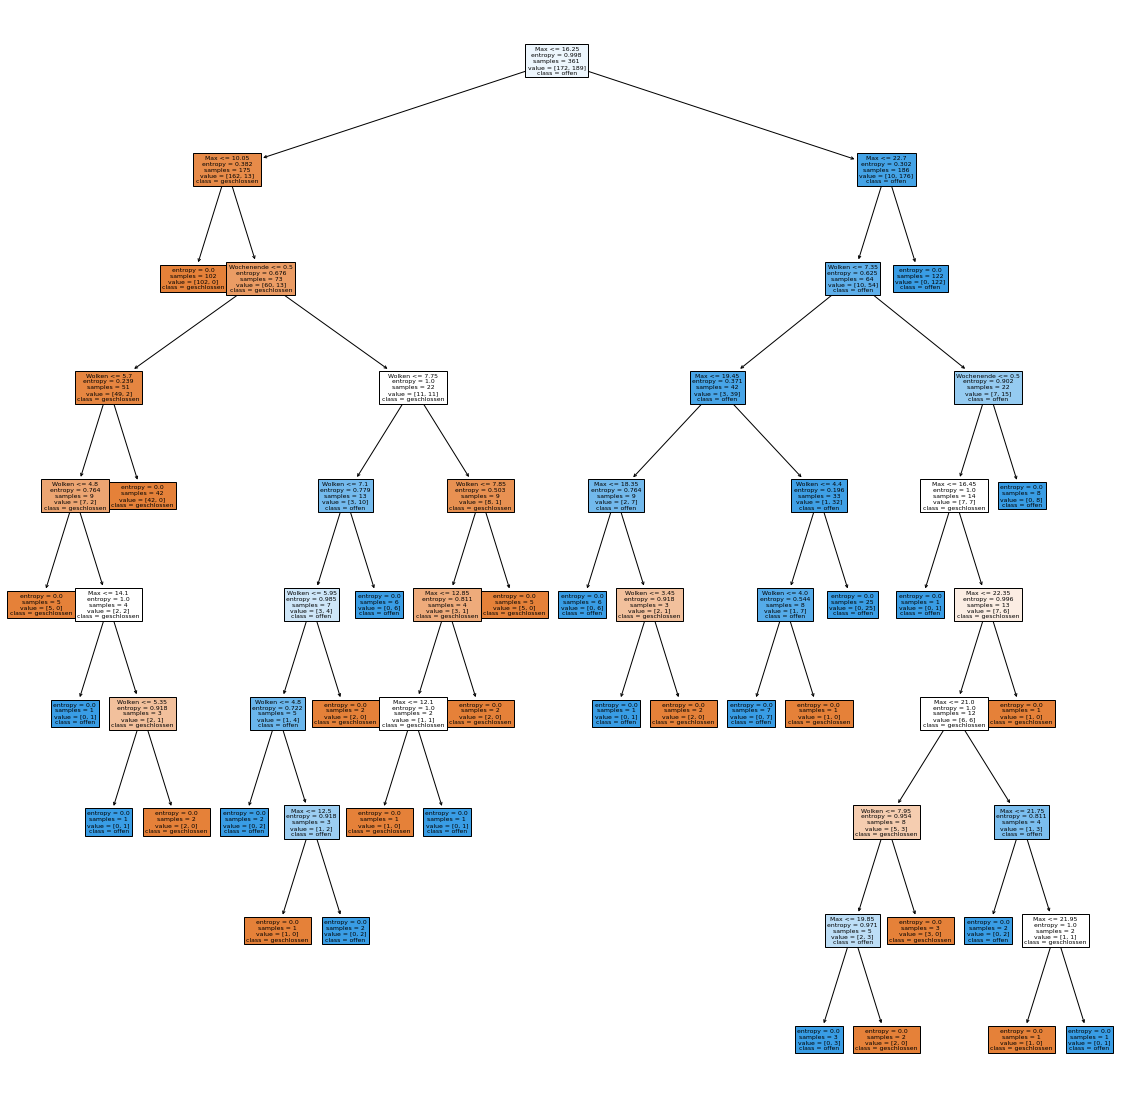

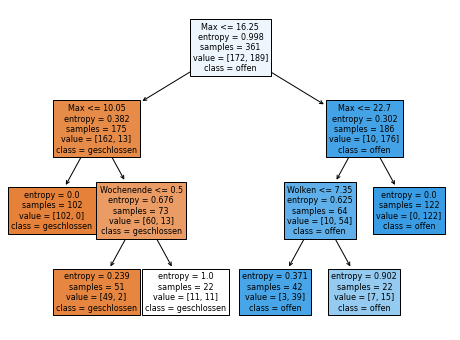

In [ ]:
# Bibliotheken laden
# für Entscheidungsbäume
from sklearn import tree
# für deren grafische Darstellung
from matplotlib import pyplot 

# unabhänige und abhängige Variablen 
X=pandas.DataFrame(eisdaten[['Max','Wolken','Wochenende']])
y=pandas.DataFrame(eisdaten[['Zustand']])

features = ['Max','Wolken','Wochenende']
# müssen in alphabetischer Reihenfolge sein!
klassen = ['geschlossen','offen']

# Baum1 trainieren (erwartet: Overfitting)
baum1 = tree.DecisionTreeClassifier(criterion='entropy',random_state=42)
baum1.fit(X, y)

# Baum2 (erwartet: kein Overfitting)
baum2 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)
baum2.fit(X, y)

# Baum grafisch darstellen
pyplot.figure(figsize=(20,20))
tmp = tree.plot_tree(baum1,feature_names=features,class_names=klassen,filled=True)
pyplot.figure(figsize=(8,6))
tmp = tree.plot_tree(baum2,feature_names=features,class_names=klassen,filled=True)


## Jetzt sind Sie dran: Bäume evaluieren

Bevor Sie weitermachen, überlegen Sie: welche Werte erwarten Sie für Baum1, bei dem wir mit Overfitting rechnen? Wir evaluieren den Baum aufgrund der Vorhersagen, die er auf den Daten macht, auf denen er trainiert wurde, auf die er also übermäßig angepasst ist. Wird er also gut oder schlecht sein? 

Antwort: 

Berechnen Sie jetzt die Accuracy. Falls Sie die Zellen ganz oben in diesem Notebook schon länger nicht mehr ausgeführt haben (die Zellen, die die Funktionen für die Evaluationsmaße importieren), kann es sinnvoll sein, diese jetzt nochmal zu importieren, weil sie mittlerweile nicht mehr im Speicher sind. Andernfalls können Sie auch nach oben scrollen und die entsprechenden Zellen noch einmal ausführen. 

In [ ]:
# falls nicht oben vor kurzem ausgeführt: Importiere die Funktion, die die Accuracy berechnen kann


In [ ]:
# Nutze beide Bäume, um die Klassen aus der erklärenden Variablen X vorherzusagen
y1_hut =  
y2_hut =  

In [ ]:
# Berechne die Accuracy (Anteil korrekt vorhergesagter Klassen)
accuracy = 
print(accuracy)
accuracy = 
print(accuracy)

Haben sich Ihre Erwartungen erfüllt? Welcher Baum ist bei diesen Vorhersagen besser? 

Antwort: 

Berechnen Sie jetzt die Konfusionsmatrizen für beide Bäume. 

In [ ]:
# falls nicht oben vor kurzem ausgeführt: Importiere die Funktion, die die Konfusionsmatrix berechnen kann


In [ ]:
# Berechne die Konfusionsmatrix aus den korrekten Klassen und den vorhergesagten Klasen und gebe sie aus


Für welchen der beiden Bäume bekommen Sie auch falsche Vorhersagen? Wie viele sind es insgesamt? 

Antwort: 

Berechnen Sie nun Precision und Recall (jeweils die Macro-Variante).

In [ ]:
# falls nicht oben vor kurzem ausgeführt: Importiere die Funktion, die Precision und Recall berechnet


In [ ]:
# Berechne die Macro-Precision und gebe sie aus


In [ ]:
# Berechne den Macro-Recall und gebe ihn aus


Und schließlich noch den F1-Score:

In [ ]:
# falls nicht oben vor kurzem ausgeführt: Importiere die Funktion, die den F-Score berechnet


In [ ]:
# Berechne den F1-Score


## Überlegung zum Abschluss

Wir erwarten, dass Baum1 Overfitting aufweist. Nachdem Sie nun diesen Baum mit verschiedenen Maßen evaluiert haben: Wann sollte man also bei der Evaluierung von KI-Modellen skeptisch werden und Overfitting vermuten? 

Antwort: 